# Test hyperboloid calculations
Mainly a question of plotting...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, path, patches
%matplotlib inline

In [2]:
from geometry import * 

## Tests of dot:
Null vector dotted with unit vector, expect zero

## Tests of dot:
Null vector dotted with unit vector, expect zero in both cases

In [3]:
u = np.ones(2)
v = np.zeros(2)
print("Spherical = {}, hyperbolic = {}".format(dot(u, v), dot(u, v, geometry="hyperbolic")))

Spherical = 0.0, hyperbolic = 0.0


Dot parallel unit vectors, expect spherical = 2 and hyperbolic = 0 

In [4]:
u = np.ones(2)
v = np.array([1, 1])
print("Spherical = {}, hyperbolic = {}".format(dot(u, v), dot(u, v, geometry="hyperbolic")))

Spherical = 2.0, hyperbolic = 0.0


Dot anti-parallel unit vectors, expect spherical = -2 and hyperbolic = 0

In [5]:
v = -v
print("Spherical = {}, hyperbolic = {}".format(dot(u, v), dot(u, v, geometry="hyperbolic")))

Spherical = -2.0, hyperbolic = 0.0


Dot perpendicular vectors, expect spherical = 0 and hyperbolic = 2

In [6]:
u = np.ones(2)
v = np.array([1, -1])
print("Spherical = {}, hyperbolic = {}".format(dot(u, v), dot(u, v, geometry="hyperbolic")))

Spherical = 0.0, hyperbolic = 2.0


## Plot a hyperboloid

In [7]:
theta = np.linspace(-0.323*np.pi, 0.323*np.pi, 1000)
x0 = np.sinh(theta)
x1 = np.cosh(theta)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])
#print(x)

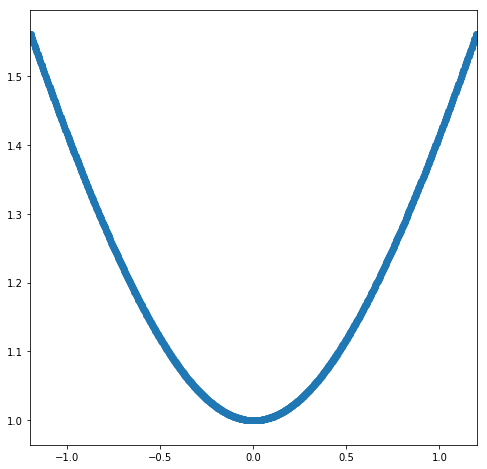

In [8]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2])
plt.scatter(x0, x1)

# Calculate tangents

This is (presumably) less straightforward than in Euclidean space? Test using the projection operator to find the tangent vector

In [9]:
point_on_manifold = np.array([0., 1.])
displacement = np.array([1., 0.])
projection = project_to_tangent(point_on_manifold, displacement, geometry="hyperbolic")
print(projection)
tangent_space_line = [point_on_manifold - projection, point_on_manifold + projection]
euclidean_tangent_vector = np.array([[0, -1], [1, 0]]).dot(point_on_manifold)
eucl_tangent_space_line = [point_on_manifold - euclidean_tangent_vector,
                           point_on_manifold + euclidean_tangent_vector]
print((-0.6*point_on_manifold[0]-1)/point_on_manifold[1])
np.testing.assert_array_equal(-projection, euclidean_tangent_vector)

[1. 0.]
-1.0


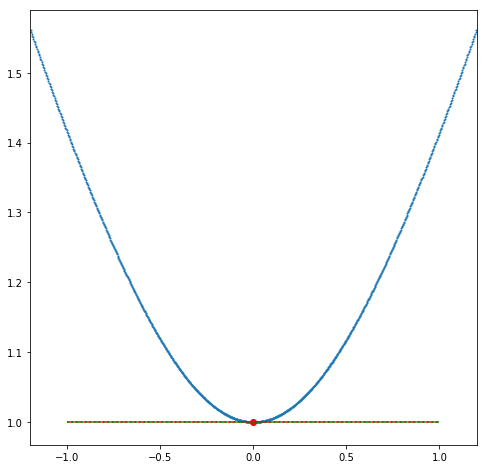

In [10]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2])
plt.scatter(x0, x1, s=1)
plt.scatter(point_on_manifold[0], point_on_manifold[1], color='r')
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle=(1,[2,1])))
ax.add_line(lines.Line2D([eucl_tangent_space_line[0][0], eucl_tangent_space_line[1][0]],
                          [eucl_tangent_space_line[0][1], eucl_tangent_space_line[1][1]],
                          color="g", linestyle=(0,[2,1])))


In [11]:
point_on_manifold = np.array([np.sinh(0.481), np.cosh(0.481)])
displacement = np.array([1., 0.])
projection = project_to_tangent(point_on_manifold, displacement, geometry="hyperbolic")
tangent_space_line = [point_on_manifold - projection, point_on_manifold + projection]
euclidean_tangent_vector = np.array([[0, -1], [1, 0]]).dot(point_on_manifold)
eucl_tangent_space_line = [point_on_manifold - euclidean_tangent_vector,
                           point_on_manifold + euclidean_tangent_vector]
alt_tangent_space_line = [[-0.6,(-0.6*point_on_manifold[0]-1)/point_on_manifold[1]],
                          [0.6, (0.6*point_on_manifold[0]-1)/point_on_manifold[1]]   
                         ]
#np.testing.assert_array_equal(-projection, euclidean_tangent_vector)

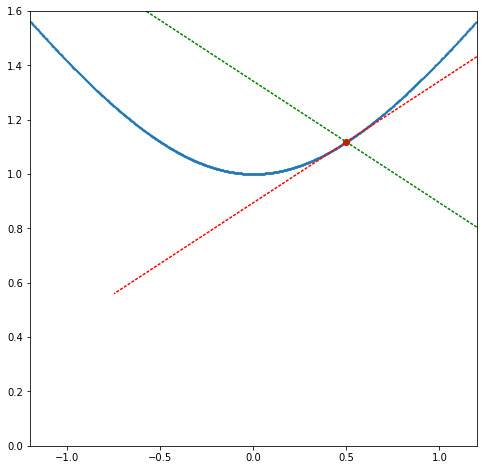

In [12]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[0., 1.6])
plt.scatter(x0, x1, s=1)
plt.scatter(point_on_manifold[0], point_on_manifold[1], color='r')
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle=(1,[2,1])))
ax.add_line(lines.Line2D([eucl_tangent_space_line[0][0], eucl_tangent_space_line[1][0]],
                          [eucl_tangent_space_line[0][1], eucl_tangent_space_line[1][1]],
                          color="g", linestyle=(0,[2,1])))
#ax.add_line(lines.Line2D([alt_tangent_space_line[0][0], alt_tangent_space_line[1][0]],
#                          [alt_tangent_space_line[0][1], alt_tangent_space_line[1][1]],
#                          color="b", linestyle='-'))

Direction of the tangent line is quite different in this case, since spherical and hyperboloid geometries don't coincidentally agree here. 

In [13]:
point_on_manifold = np.array([np.sinh(0.481), np.cosh(0.481)])
displacement = np.array([0.4, 0.])
projection = project_to_tangent(point_on_manifold, displacement, geometry="hyperbolic")
tangent_space_line = [point_on_manifold - 1*projection, point_on_manifold + 1*projection]  
#np.testing.assert_array_equal(-projection, euclidean_tangent_vector)

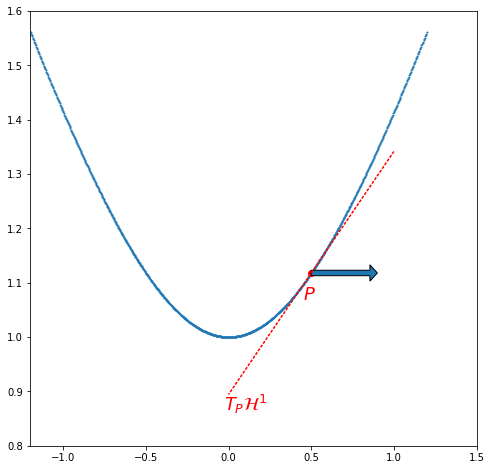

In [14]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.5], ylim=[0.8, 1.6])
plt.scatter(x0, x1, s=1)
plt.scatter(point_on_manifold[0], point_on_manifold[1], color='r')
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle=(1,[2,1])))
ax.annotate(r"$P$", xy=point_on_manifold-(0.03,0.03), xytext=point_on_manifold-(0.05,0.05), fontsize=18, color='r')
ax.annotate(r"$T_P\mathcal{H}^1$", xy=tangent_space_line[0]-(0.03,0.03), xytext=tangent_space_line[0]-(0.03,0.03),
            fontsize=18, color='r')
ax.arrow(point_on_manifold[0], point_on_manifold[1], displacement[0], displacement[1], 
        width=0.01, length_includes_head=True)

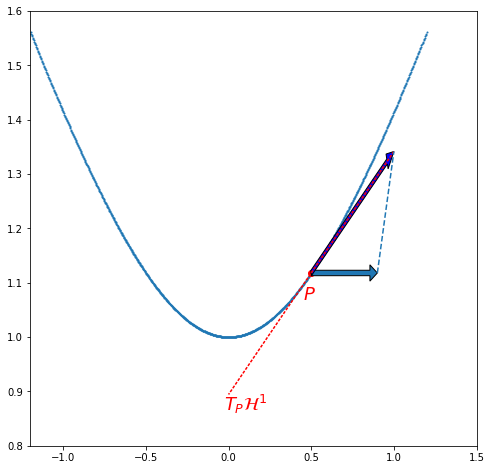

In [15]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.5], ylim=[0.8, 1.6])
plt.scatter(x0, x1, s=1)
plt.scatter(point_on_manifold[0], point_on_manifold[1], color='r')
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle=(1,[2,1])))
ax.annotate(r"$P$", xy=point_on_manifold-(0.03,0.03), xytext=point_on_manifold-(0.05,0.05), fontsize=18, color='r')
ax.annotate(r"$T_P\mathcal{H}^1$", xy=tangent_space_line[0]-(0.03,0.03), xytext=tangent_space_line[0]-(0.03,0.03),
            fontsize=18, color='r')
ax.arrow(point_on_manifold[0], point_on_manifold[1], displacement[0], displacement[1], 
        width=0.01, length_includes_head=True)
ax.add_line(lines.Line2D([(point_on_manifold+displacement)[0], 
                          (point_on_manifold+projection)[0]
                         ],
                         [(point_on_manifold+displacement)[1], 
                          (point_on_manifold+projection)[1]
                         ], linestyle="--"
                        )
           )
ax.arrow(point_on_manifold[0], point_on_manifold[1], projection[0], projection[1], 
        width=0.01, length_includes_head=True, facecolor='b')

In [16]:
displacement_manifold = exponential_map(projection, point_on_manifold, geometry="hyperbolic")
print(displacement_manifold)

norm_v_tan =  0.4471712405209252
[1.06730125 1.46257716]


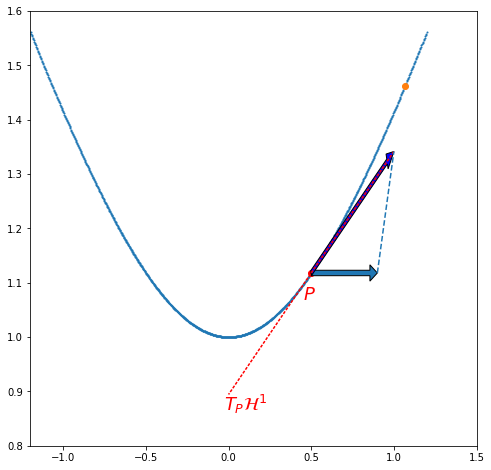

In [17]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.5], ylim=[0.8, 1.6])
plt.scatter(x0, x1, s=1)
plt.scatter(point_on_manifold[0], point_on_manifold[1], color='r')
ax.add_line(lines.Line2D([tangent_space_line[0][0], tangent_space_line[1][0]],
                          [tangent_space_line[0][1], tangent_space_line[1][1]],
                          color="r", linestyle=(1,[2,1])))
ax.annotate(r"$P$", xy=point_on_manifold-(0.03,0.03), xytext=point_on_manifold-(0.05,0.05), fontsize=18, color='r')
ax.annotate(r"$T_P\mathcal{H}^1$", xy=tangent_space_line[0]-(0.03,0.03), xytext=tangent_space_line[0]-(0.03,0.03),
            fontsize=18, color='r')
ax.arrow(point_on_manifold[0], point_on_manifold[1], displacement[0], displacement[1], 
        width=0.01, length_includes_head=True)
ax.add_line(lines.Line2D([(point_on_manifold+displacement)[0], 
                          (point_on_manifold+projection)[0]
                         ],
                         [(point_on_manifold+displacement)[1], 
                          (point_on_manifold+projection)[1]
                         ], linestyle="--"
                        )
           )
ax.arrow(point_on_manifold[0], point_on_manifold[1], projection[0], projection[1], 
        width=0.01, length_includes_head=True, facecolor='b')
ax.scatter(displacement_manifold[0], displacement_manifold[1])

In [18]:
distance_along_geodesic = distance(displacement_manifold, point_on_manifold, geometry="hyperbolic")
dotprod = dot(displacement_manifold, point_on_manifold, geometry="hyperbolic")
print("x.p = {:3g}, distance = {:3g}".format(dotprod, distance_along_geodesic))

x.p = -1.10166, distance = 0.447171


In [20]:
distance_eucl = distance(displacement_manifold, point_on_manifold, geometry="euclidean")
distance_along_geodesic = distance(displacement_manifold, point_on_manifold, geometry="spherical")
dotprod = dot(displacement_manifold, point_on_manifold, geometry="spherical")
print("x.p = {:3g}, distance = {:3g}, euclidean distance = {:.3g}".format(dotprod, distance_along_geodesic, distance_eucl))

x.p = 2.16845, distance = nan, euclidean distance = 0.664


/Users/david/Work/ASOS/GeometryTests/geometry.py:50: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(dotprod)
